In [1]:
# loading the dataset

import pandas as pd

df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
# checking for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# creating a copy of the dataset

df1 = df.copy()
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Descriptive statistics

In [6]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- From the descriptive statistics we can see that the mininum values for Glucose,BloodPressure,SkinThickness,Insulin and BMI were zero. This caanot be true since the values cannot be zero.
- We shall treat the zeros as missing values.

In [7]:
import numpy as np
# convet the zeros to null values

df1[['Glucose','BloodPressure','SkinThickness','Insulin', 'BMI']] = df1[['Glucose','BloodPressure','SkinThickness','Insulin', 'BMI']].replace(0,np.NaN)

In [8]:
# checking for missing values

df1.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [10]:
df1.to_csv("df1.csv",index=False)

We can visualize the numerical features using histograms or boxplots.

In [11]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

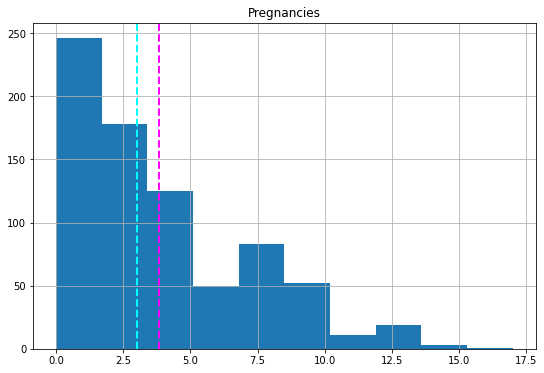

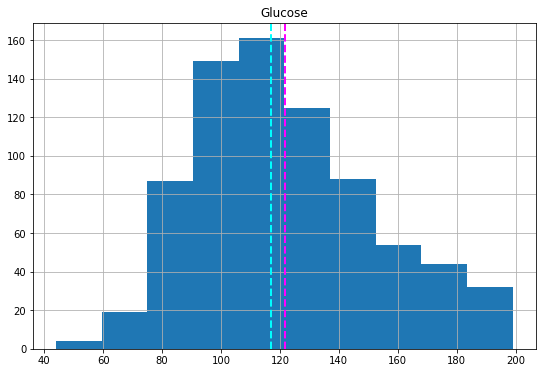

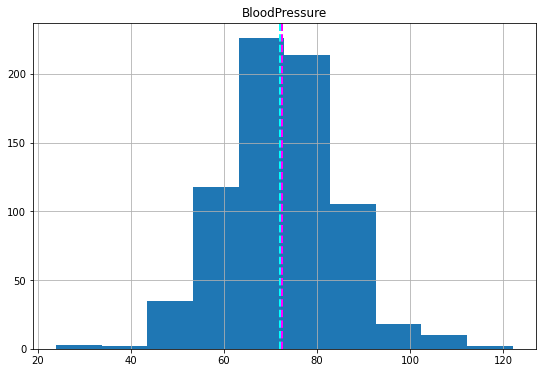

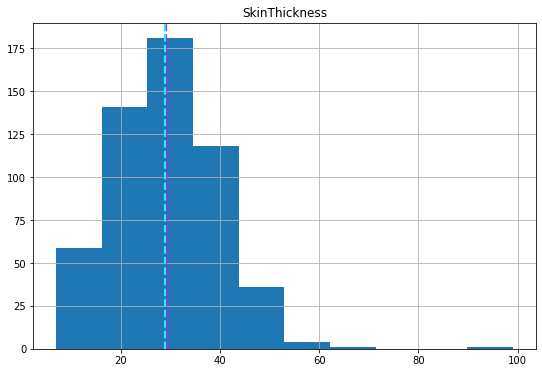

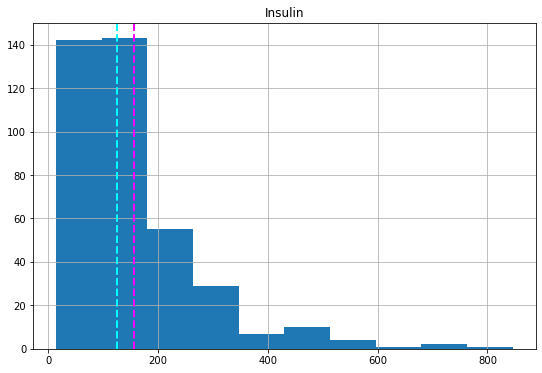

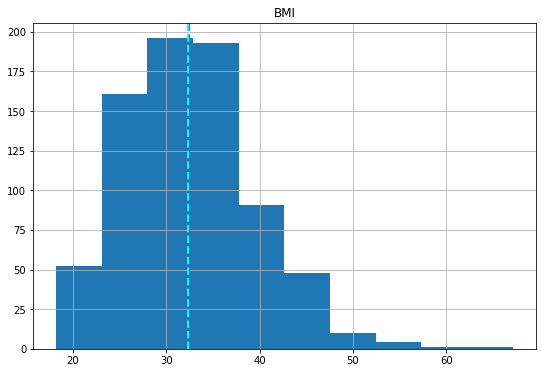

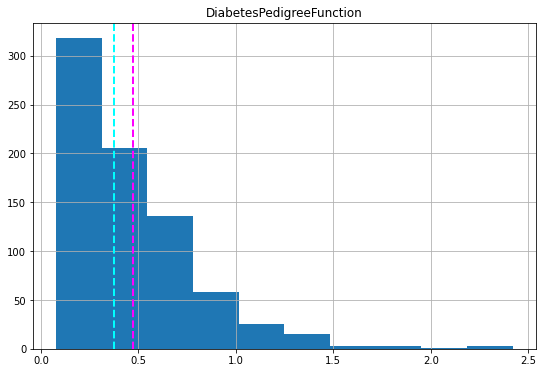

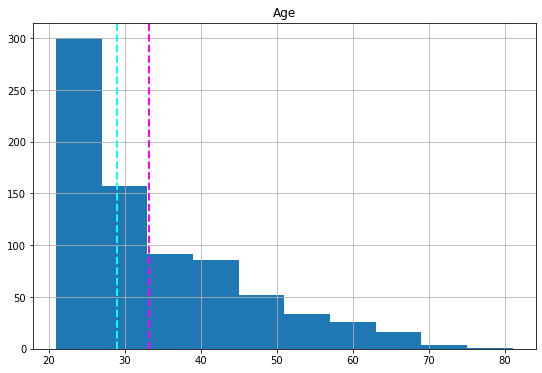

In [12]:
import matplotlib.pyplot as plt
# Creating an histogram for each numeric feature
numeric_features = df1.drop("Outcome",axis=1)

for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = df1[col]
    feature.hist(ax=ax)
    ax.axvline(feature.mean(),color = 'magenta',linestyle='dashed',linewidth=2)
    ax.axvline(feature.median(),color = 'cyan',linestyle='dashed',linewidth=2)
    ax.set_title(col)
plt.show()

- The mean and median of pregnancies,Insulin,DiabetesPedigreeFunction and Age are  closer to the low end of the range,this means that they have right-skewed distribution.
- Glucose,BloodPressure,Skin Thickness and BMI seem to be normally distributed,with the mean and median nearer the middle of the range of values.

### DATA PREPROCESSING

#### 1. IMPUTATION

In [13]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("df1.csv")
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [14]:
df1.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
# Imputation

df1["Glucose"].fillna((df1["Glucose"].mean()),inplace=True)
df1["BloodPressure"].fillna((df1["BloodPressure"].mean()),inplace=True)
df1["SkinThickness"].fillna((df1["SkinThickness"].mean()),inplace=True)
df1["Insulin"].fillna((df1["Insulin"].median()),inplace=True)
df1["BMI"].fillna((df1["BMI"].mean()),inplace=True)

In [16]:
# confirming the dataset does not have missing values
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33,1


#### 2. Categorical encoding 

 

In [18]:
df1["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Our target varible(Outcome) is a binary category because it has two possibilities:
- 1(Diabetic)
- 0(Non Diabetic)
    

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [20]:
# converting the target variable to category

df1["Outcome"] = df1["Outcome"].astype("category").cat.as_ordered()

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(6), int64(2)
memory usage: 49.0 KB


#### 3. Checking for outliers

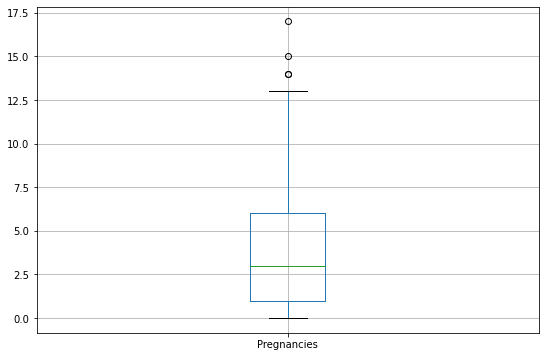

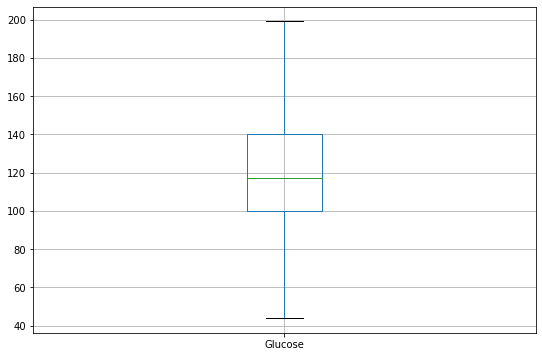

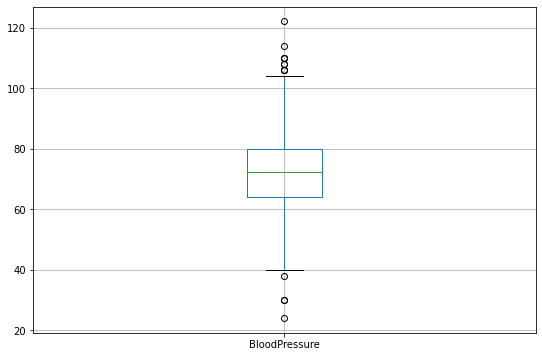

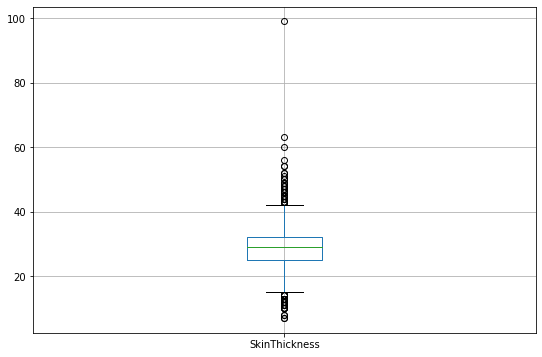

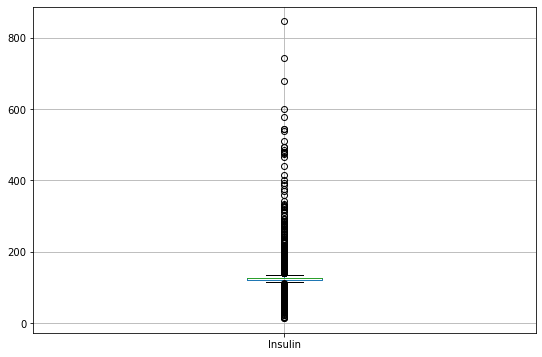

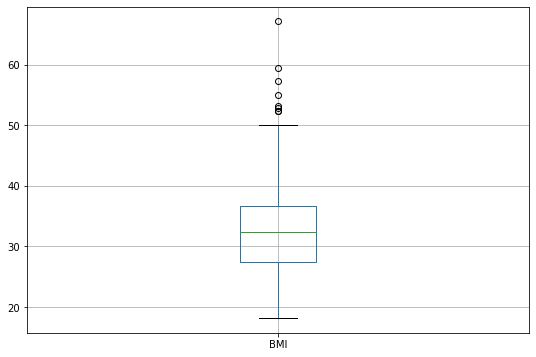

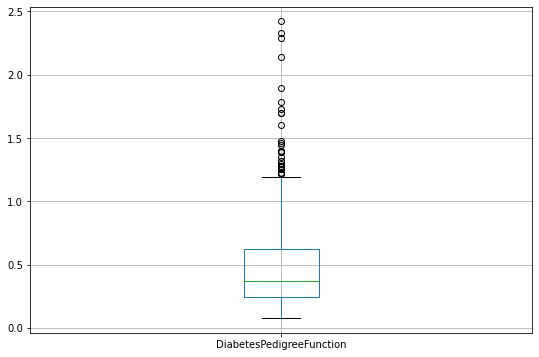

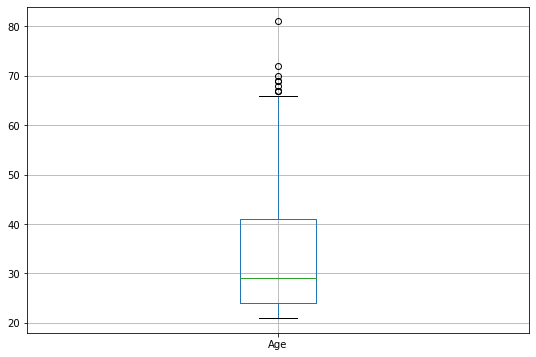

In [22]:
# Plotting boxplots for the numerical features

for col in numeric_features:
    fig=plt.figure(figsize=(9,6))
    ax = fig.gca()
    df1.boxplot(col,ax=ax)
plt.show()

In [23]:
df1.Insulin

0      125.0
1      125.0
2      125.0
3       94.0
4      168.0
       ...  
763    180.0
764    125.0
765    112.0
766    125.0
767    125.0
Name: Insulin, Length: 768, dtype: float64

##### Removing outliers

In [24]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,125.0,30.1,0.349,47,1


#### 4. Numerical Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()
# Normalize numeric columns

df1[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]=scaler.fit_transform(df1[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]])


In [26]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.240798,0.133413,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


#### 5. Feature selection

In [27]:
cor = df1.corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.025047,0.021565,-0.033523,0.544341
Glucose,0.127911,1.000000,0.218367,0.192991,0.419064,0.230941,0.137060,0.266534
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.045087,0.281268,-0.002763,0.324595
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.154678,0.542398,0.100966,0.127872
Insulin,0.025047,0.419064,0.045087,0.154678,1.000000,0.180170,0.126503,0.097101
BMI,0.021565,0.230941,0.281268,0.542398,0.180170,1.000000,0.153400,0.025519
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.126503,0.153400,1.000000,0.033561
Age,0.544341,0.266534,0.324595,0.127872,0.097101,0.025519,0.033561,1.000000


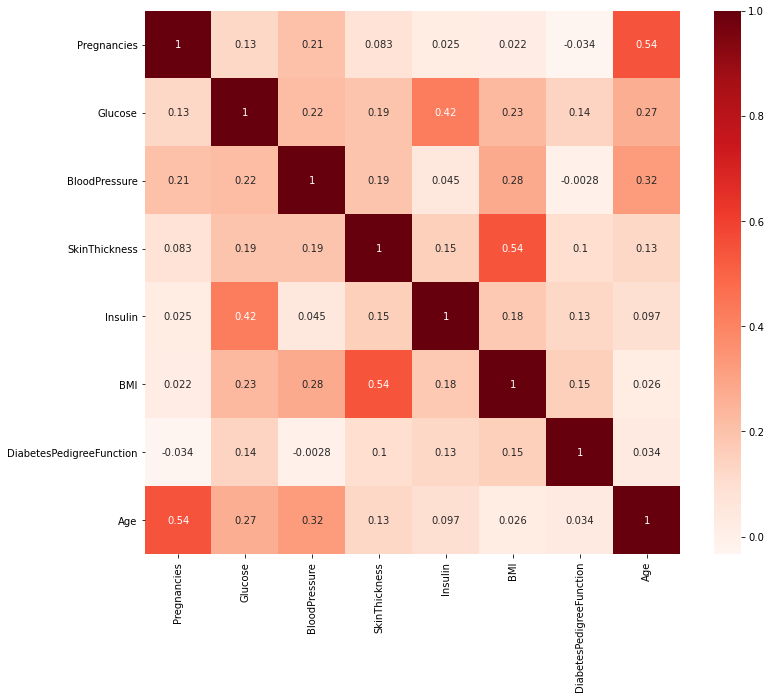

In [28]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

Since all the features(except SkinThickness and BMI) we can conclude that they probably predictive of the outcome.

In [29]:
# Separate the features from labels
features=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
label=["Outcome"]

x,y = df1[features].values,df1[label].values

#### 6. Split the data into training and validation set

In [30]:
from sklearn.model_selection import train_test_split

# split data 80%-20% into training and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=0)
print('Training cases:%d\nTest cases:%d'%(x_train.shape[0],x_test.shape[0]))

Training cases:652
Test cases:116


In [31]:
%%time
# Train the model
from sklearn.linear_model import LogisticRegression

# set regularization rate
reg=0.01
# Train a logistic regression model on the training set

model=LogisticRegression(C=1/reg,solver="liblinear").fit(x_train,y_train)
print(model)

LogisticRegression(C=100.0, solver='liblinear')
Wall time: 229 ms


C:\Users\User-Pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
# We'll can test the training set using the data we held back to evaluate how well it predicts

predictions=model.predict(x_test)
print('Predicted labels:',predictions)
print('Actual labels:',y_test)

Predicted labels: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1]
Actual labels: [[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


#### 6. Checking for model accuracy

In [33]:
# We may check the accuracy of the predictions(what proportion of the labels did the model predict correctly)

from sklearn.metrics import accuracy_score
print('Accuracy',accuracy_score(y_test,predictions))


Accuracy 0.8275862068965517


This means the model got 82.75% of the predictions right.

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        78
           1       0.78      0.66      0.71        38

    accuracy                           0.83       116
   macro avg       0.81      0.78      0.80       116
weighted avg       0.82      0.83      0.82       116



In [35]:
# We can retrive precision and recall values on their 
from sklearn.metrics import precision_score,recall_score

print("Overall Precision:",precision_score(y_test,predictions))
print("Overall Recall:",recall_score(y_test,predictions))

Overall Precision: 0.78125
Overall Recall: 0.6578947368421053


- **Precision**: Of all the predictions the model made for this class, what proportion were correct?

Of all the patients the model predicted are diabetic,78% are actually diabetic.

- **Recall**: Out of all of the instances of this class in the test dataset, how many did the model identify?

Of all the patients that are actual diabetic, the model identified 66%


These metrics are generally tabulated for the test data and shown together as a **confusion matrix**. The **True Negatives** and **True Positives** should be significantly higher than the *false predictions* for the model to be any good. 

Text(0.5, 15.0, 'Predicted Label')

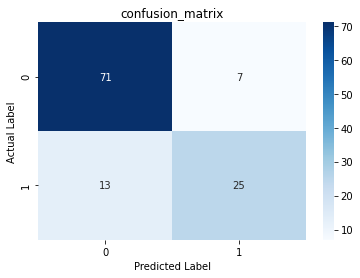

In [36]:
from sklearn.metrics import confusion_matrix
# print the confusion matrix
cm=confusion_matrix(y_test,predictions)
fig=sns.heatmap(pd.DataFrame(cm),annot=True,cmap=plt.cm.Blues)
plt.title("confusion_matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [37]:
from sklearn.metrics import roc_auc_score

y_score=model.predict_proba(x_test)
auc = roc_auc_score(y_test,y_score[:,1])
print('AUC:'+ str(auc))

AUC:0.8879892037786774


Area Under the Curve(AUC) quantifies the overall performance of the model.The closer to 1 this value is, the better the model.

#### Try a different algorithms

In [43]:
%%time
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
print(model)

KNeighborsClassifier(n_neighbors=3)
Wall time: 7 ms


C:\Users\User-Pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [51]:
predictions2=model2.predict(x_test)

print("Overall Precision:",precision_score(y_test,predictions))
print("Overall Recall:",recall_score(y_test, predictions))


Overall Precision: 0.6585365853658537
Overall Recall: 0.7105263157894737


In [46]:
print("Overall Accuracy:",accuracy_score(y_test,predictions2))

Overall Accuracy: 0.7844827586206896


Text(0.5, 15.0, 'Predicted Label')

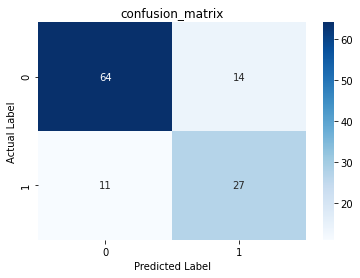

In [47]:
# print the confusion matrix
cm=confusion_matrix(y_test,predictions2)
fig=sns.heatmap(pd.DataFrame(cm),annot=True,cmap=plt.cm.Blues)
plt.title("confusion_matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [48]:
y_score=model2.predict_proba(x_test)
auc = roc_auc_score(y_test,y_score[:,1])
print('AUC:'+ str(auc))

AUC:0.7989203778677463


We can see that Logistic Regression Algorithm performed better than K-NeaghborsClassifier.
We'll now try **Ensemble Algorithm**(Random Forest Classifier)

In [49]:
%%time
from sklearn.ensemble import RandomForestClassifier

model3=RandomForestClassifier(n_estimators=100).fit(x_train,y_train)

<timed exec>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Wall time: 1.84 s


##### Checking for model accuracy

In [50]:
# get the predictions

predictions3=model3.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predictions))

Accuracy: 0.7844827586206896


In [52]:
print("Overall Precision:",precision_score(y_test,predictions3))
print("Overall Recall:",recall_score(y_test, predictions3))


Overall Precision: 0.6944444444444444
Overall Recall: 0.6578947368421053


Text(0.5, 15.0, 'Predicted Label')

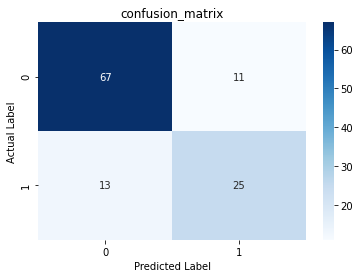

In [53]:
cm=confusion_matrix(y_test,predictions3)
fig=sns.heatmap(pd.DataFrame(cm),annot=True,cmap=plt.cm.Blues)
plt.title("confusion_matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [54]:
y_score=model3.predict_proba(x_test)
auc = roc_auc_score(y_test,y_score[:,1])
print('AUC:'+ str(auc))

AUC:0.8535762483130904


From the three different algorithms, the Logistic Regression Algorithm performed the best.

We will save the best model as a pickle file

In [56]:
# save the best model
import joblib
filename='./diabetic_model.pkl'
joblib.dump(model,filename)

['./diabetic_model.pkl']